<a href="https://colab.research.google.com/github/Enixma05/Enixma05/blob/main/Tubes_Pemsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hubungan Pendidikan Orang Tua dan Prestasi Matematika Siswa dengan One Way ANOVA

### Anggota Kelompok:
### -Fadlullah Hasan [F1D02310008]
### -Datu Reksa Hamza Putra [F1D02310045]
### -Karina Septia Suwandi [F1D02310066]
### -Nur Adinda Juniarti [F1D02310129]


# Asumsi awal (Hipotesis)
H0 = Tidak terdapat perbedaan antara
pendidikan orang tua dengan prestasi matematika anak

H1 = Terdapat perbedaan antara
pendidikan orang tua dengan prestasi matematika anak

# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load Data

Dataset dapat diunduh pada link berikut: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [ ]:
!git clone https://github.com/Enixma05/Tubes-Pemsis.git

Cloning into 'Tubes-Pemsis'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 185.31 KiB | 7.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
dataset = ("/content/Tubes-Pemsis/StudentsPerformance.csv")

In [ ]:
df = pd.read_csv(dataset)
#nama kolom tidak dianggap
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
n = df["math_score"].count()
print(n)

1000


karena banyak data (n) adalah = 1000, maka metode yang digunakan untuk uji normalitas data adalah shapiro-wilk

In [ ]:
print("Statistik Deskriptif:")
print(df.groupby('parental_level_of_education')['math_score'].describe())

Statistik Deskriptif:
                             count       mean        std   min    25%   50%  \
parental_level_of_education                                                   
associate's degree           222.0  67.882883  15.112093  26.0  57.00  67.0   
bachelor's degree            118.0  69.389831  14.943789  29.0  61.00  68.0   
high school                  196.0  62.137755  14.539651   8.0  53.75  63.0   
master's degree               59.0  69.745763  15.153915  40.0  55.50  73.0   
some college                 226.0  67.128319  14.312897  19.0  59.00  67.5   
some high school             179.0  63.497207  15.927989   0.0  53.00  65.0   

                              75%    max  
parental_level_of_education               
associate's degree           80.0  100.0  
bachelor's degree            79.0  100.0  
high school                  72.0   99.0  
master's degree              81.0   95.0  
some college                 76.0  100.0  
some high school             74.0   97.0  


# Uji Normalitas

In [ ]:
print("Uji Normalitas kelompok data:")
for level in df['parental_level_of_education'].unique():
    data = df[df['parental_level_of_education'] == level]['math_score']
    stat, p = stats.shapiro(data)
    print(f"{level}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Tidak Normal)'}")

Uji Normalitas kelompok data:
bachelor's degree: p-value = 0.6044 (Normal)
some college: p-value = 0.0959 (Normal)
master's degree: p-value = 0.0317 (Tidak Normal)
associate's degree: p-value = 0.0446 (Tidak Normal)
high school: p-value = 0.0652 (Normal)
some high school: p-value = 0.0052 (Tidak Normal)


In [ ]:
# for level in df['parental_level_of_education'].unique():
#     plt.figure(figsize=(6, 4))
#     sns.histplot(data, kde=True, bins=20, color='skyblue')
#     plt.title(f'Distribusi Math Score - {level}\nShapiro p = {p:.4f}')
#     plt.xlabel('Math Score')
#     plt.ylabel('Frekuensi')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

Karena ada beberapa kelompok data yang tidak normal, maka digunakan metode levene untuk uji homogenitas

# Uji Homogenitas

In [ ]:
groups = [df[df['parental_level_of_education'] == level]['math_score']
          for level in df['parental_level_of_education'].unique()]
levene_stat, levene_p = stats.levene(*groups)
print(f"\nUji Homogenitas Varians (Levene): p-value = {levene_p:.4f} {'(Homogen)' if levene_p > 0.05 else '(Tidak Homogen)'}")


Uji Homogenitas Varians (Levene): p-value = 0.4584 (Homogen)


Karena nilai p-value > 0.05(data homogen), maka uji ANOVA dapat dilakukan untuk dataset

# Uji Anova

In [ ]:
anova = stats.f_oneway(*groups)
print(f"Uji ANOVA: p-value = {anova.pvalue:.6f} {'(Terdapat Perbedaan Signifikan)' if anova.pvalue < 0.05 else '(Tidak Terdapat Perbedaan Signifikan)'}")

Uji ANOVA: p-value = 0.000006 (Terdapat Perbedaan Signifikan)


# Hasil Pengujian
Ada perbedaan yang signifikan antara rata-rata yang dihitung dari beberapa kelompok

Maka hipotesis yang diterima = H1




# Uji Lanjutan

Dikarenakan terdapat perbedaan yang signifikan setelah dilakukan uji Anova One-Way, maka diperlukan uji lanjutan dengan metode Tukey HSD (Honestly Significant Difference) untuk mengetahui kelompok mana yang mempunyai perbedaan yang signifikan

In [ ]:
print("\nUji Lanjutan (Tukey HSD jika ANOVA signifikan):")
tukey_result = pairwise_tukeyhsd(endog=df['math_score'],
                                 groups=df['parental_level_of_education'],
                                 alpha=0.05)
print(tukey_result)


Uji Lanjutan (Tukey HSD jika ANOVA signifikan):
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree   1.5069 0.9503  -3.3587  6.3726  False
associate's degree       high school  -5.7451 0.0013  -9.9311 -1.5591   True
associate's degree   master's degree   1.8629 0.9578  -4.3927  8.1185  False
associate's degree      some college  -0.7546 0.9948  -4.7903  3.2812  False
associate's degree  some high school  -4.3857 0.0418   -8.676 -0.0954   True
 bachelor's degree       high school  -7.2521 0.0005 -12.2284 -2.2757   True
 bachelor's degree   master's degree   0.3559    1.0  -6.4539  7.1658  False
 bachelor's degree      some college  -2.2615 0.7676  -7.1122  2.5892  False
 bachelor's degree  some high school  -5.8926 0.0119  -10.957 -0.8282   True
       high school   master

# Visualisasi

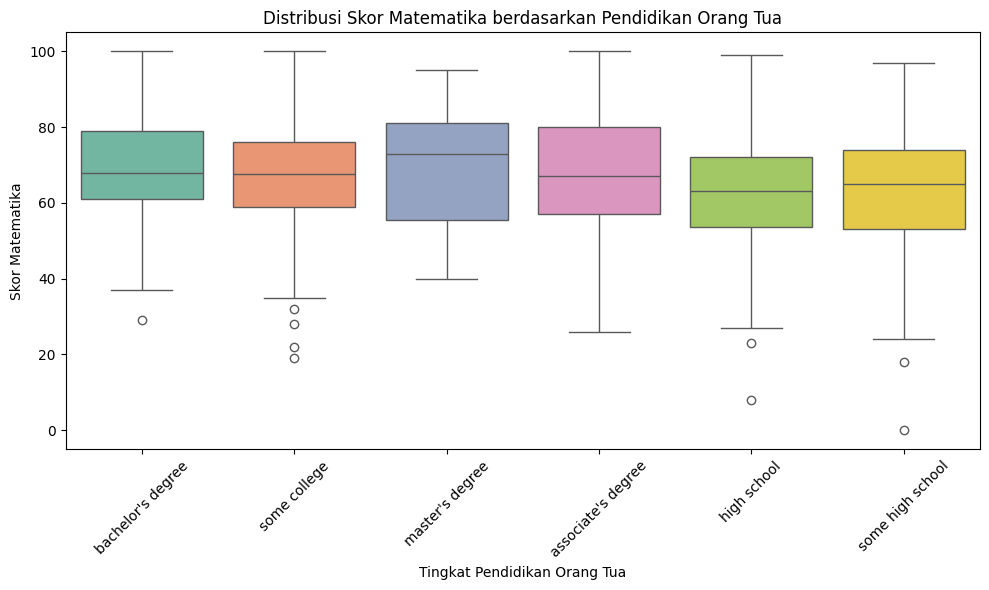

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribusi Skor Matematika berdasarkan Pendidikan Orang Tua')
plt.xlabel('Tingkat Pendidikan Orang Tua')
plt.ylabel('Skor Matematika')
plt.tight_layout()
plt.show()

# Kesimpulan
Setelah melakukan uji lanjutan dari hasil uji anova, dapat disimpulkan:

-High school secara konsisten memiliki nilai lebih rendah dibanding banyak kelompok lain.

-Associate's degree, bachelor's degree, master's degree, dan some college memiliki nilai yang lebih tinggi dari high school secara signifikan.

-Tidak ditemukan perbedaan signifikan antar kelompok berpendidikan tinggi (contoh: bachelor's vs master's, associate's vs bachelor's).

Semakin tinggi tingkat pendidikan orang tua, semakin tinggi pula kecenderungan skor matematika siswa. Kelompok dengan pendidikan rendah (high school dan some high school)